In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')

from src.data_preprocessing.data_loader import DataLoader
from src.indicators.macd import calculate_macd
from src.indicators.rsi import calculate_rsi
from src.indicators.volume_imbalance import calculate_volume_imbalance
from src.analysis.correlation import calculate_correlation
from src.analysis.state_evaluation import find_empirical_values, evaluate_current_state

In [3]:
# Binance melumatlari
symbol = 'BTCUSDT'
interval = '1d'
limit = 1000
data_loader = DataLoader(symbol, interval, limit)
data = data_loader.load_data()

In [4]:
# gostericileri hesablama
macd, signal = calculate_macd(data, 12, 26, 9)
rsi = calculate_rsi(data, 14)
volume_imbalance = calculate_volume_imbalance(data, 20)

In [5]:
# korreksialari hesabla 
macd_correlation = calculate_correlation(data['close'], macd)
rsi_correlation = calculate_correlation(data['close'], rsi)
volume_correlation = calculate_correlation(data['close'], volume_imbalance)



In [6]:
print(f"MACD Korrelyasiyası: {macd_correlation:.2f}")
print(f"RSI Korrelyasiyası: {rsi_correlation:.2f}")
print(f"Həcm Dengesizliyi Korrelyasiyası: {volume_correlation:.2f}")

MACD Korrelyasiyası: 0.39
RSI Korrelyasiyası: 0.13
Həcm Dengesizliyi Korrelyasiyası: -0.02


In [7]:
macd_bottom, macd_peak = find_empirical_values(macd, 0.05)
rsi_bottom, rsi_peak = find_empirical_values(rsi, 0.05)
volume_bottom, volume_peak = find_empirical_values(volume_imbalance, 0.05)

In [8]:
print(f"MACD Aşağı Hədd: {macd_bottom:.2f}, Yuxarı Hədd: {macd_peak:.2f}")
print(f"RSI Aşağı Hədd: {rsi_bottom:.2f}, Yuxarı Hədd: {rsi_peak:.2f}")
print(f"Həcm Dengesizliyi Aşağı Hədd: {volume_bottom:.2f}, Yuxarı Hədd: {volume_peak:.2f}")

MACD Aşağı Hədd: 2370.60, Yuxarı Hədd: -2263.94
RSI Aşağı Hədd: 83.29, Yuxarı Hədd: 20.73
Həcm Dengesizliyi Aşağı Hədd: 90231.06, Yuxarı Hədd: -91266.66


In [9]:
# hazirki halli qiymetlendirme
current_macd = macd.iloc[-1]
current_rsi = rsi.iloc[-1]
current_volume = volume_imbalance.iloc[-1]

In [10]:
correlations = [macd_correlation, rsi_correlation, volume_correlation]
current_values = [current_macd, current_rsi, current_volume]
thresholds = [(macd_bottom, macd_peak), (rsi_bottom, rsi_peak), (volume_bottom, volume_peak)]
current_state = evaluate_current_state(correlations, current_values, thresholds)
print(f"Cari Veziyyet: {current_state:.2f}")

Cari Veziyyet: -0.50


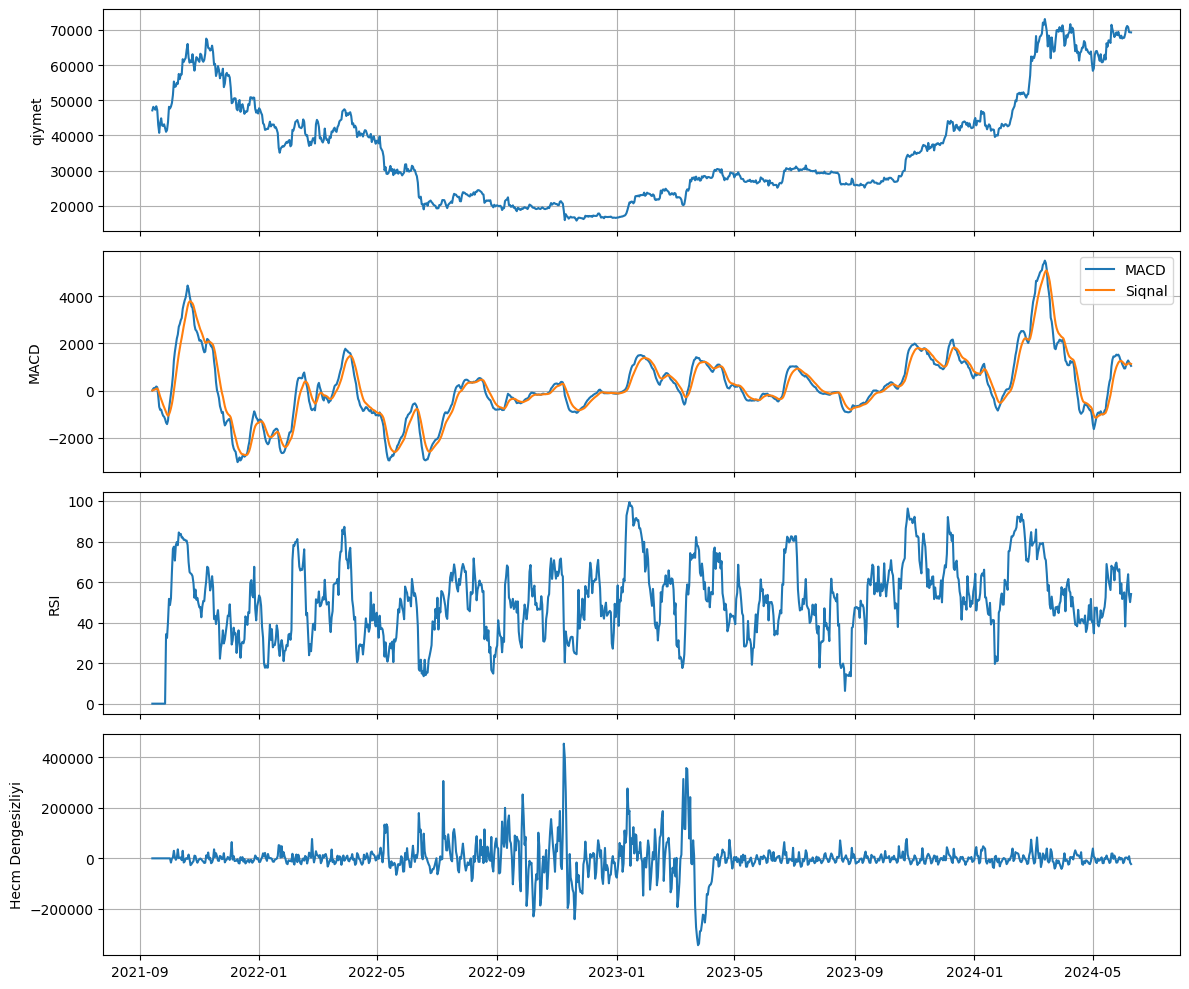

In [11]:
# Qiymət və göstəriciləri vizuallaşdır
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

ax1.plot(data['close'])
ax1.set_ylabel('qiymet')
ax1.grid()

ax2.plot(macd, label='MACD')
ax2.plot(signal, label='Siqnal')
ax2.legend()
ax2.set_ylabel('MACD')
ax2.grid()

ax3.plot(rsi)
ax3.set_ylabel('RSI')
ax3.grid()

ax4.plot(volume_imbalance)
ax4.set_ylabel('Hecm Dengesizliyi')
ax4.grid()

plt.tight_layout()
plt.show()